Qunatum Circuit Assignment 


Step 1 ) Import all the Librares (cirq , numpy )

In [ ]:
import cirq
from cirq.circuits import InsertStrategy
import numpy as np
from cirq import Simulator
import matplotlib.pyplot as plt


Step 2 ) Create circuit ,
         define length of cicuit, (=5), using LineQubit 
         apply Hadamard Gate (cirq.H(q))
         apply CNot gate with control of i th qubit at i-1 qubit
         apply SWAP gate between 1st and 5th qubit
         apply RX rotation with angle 90 degrees
         Print the circuit
         
         Note :  Creates a new moment at the desired insert location for the first operation, but then switches to inserting                    operations according to InsertStrategy.INLINE                        

In [14]:
length = 5 
qubits = cirq.LineQubit.range(length)
circuit = cirq.Circuit()
circuit.append([cirq.H(q)] for q in qubits)
circuit.append([cirq.CX(qubits[i],qubits[i+1])]for i in range(length-1))
circuit.append([cirq.SWAP(qubits[0],qubits[4])])
circuit.append([cirq.rx(np.pi/2).on(q) for q in qubits], strategy= InsertStrategy.NEW_THEN_INLINE)
print(circuit)


0: ───H───@───────────────×───Rx(0.5π)───
          │               │
1: ───H───X───@───────────┼───Rx(0.5π)───
              │           │
2: ───H───────X───@───────┼───Rx(0.5π)───
                  │       │
3: ───H───────────X───@───┼───Rx(0.5π)───
                      │   │
4: ───H───────────────X───×───Rx(0.5π)───


Assignment 2)

Create a circuit with a qubit and apply Rx rotation gate with ceratain angle theta and calculte the probability of being the state in 0 

0: ───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.006π)───Rx(0.0

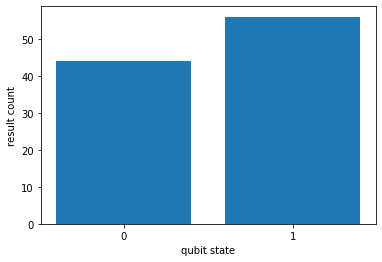

array([44., 56.])

In [44]:



length = 1  #no. of qubit  
theta = 1   #angle in degree 
n= 100     #no. of Rx gate to be applied 
qubits = cirq.LineQubit.range(length)
circuit = cirq.Circuit()
for i in range(n):
    circuit.append([cirq.rx(np.pi*theta/180).on(q) for q in qubits], strategy= InsertStrategy.NEW_THEN_INLINE)
    

circuit.append(cirq.measure(*qubits, key='x'))
print(circuit)

simulator = Simulator()
results = simulator.run(circuit, repetitions=100)

print(results.histogram(key='x')) 
x=results.histogram(key='x')
cirq.plot_state_histogram(results) 
